# Lab 9: Determining a value for absolute zero using Charles' Law for the relationship between temperature and volume

In this lab you will obtain three temperature-pressure-volume data points (at boiling, room temperature, and close to freezing), then will determine the volume based on the pressure with Boyle's Law, then use linear regression to obtain a best fit line to this data. You will then use that equation of the line to extrapolate to the zero volume value to obtain the temperature (in degrees C) for absolute zero. This python code requires some of the values that you measured in lab for the calculations, and also will read in the temperatures and pressures from a text file named 'LAB_9.CharlesLaw_Temp_Pressures.txt'. There is a file with some sample values provided, but you need to edit the text file to replace those values with those that you measured in lab. The file should have three columns of data, each with three values: Temperature(degreesC) Pressure(mmHg) Volume_water_in_flask(mL). List the hot water values first. For the boiling water data, the Volume_water_in_flask should be set to 0.0.  Note that the vapor pressure values will be determined from the appendix from the corresponding temperatures.  

First, load some of the python libraries. 

In [2]:
import numpy
import scipy
import matplotlib.pyplot as plt
from scipy import stats

Next, set up the values for total barometric pressure (mmHg) measured during lab, the humidity measured during lab, and the volume of the flask measured during lab. Replace the values below with your measured values. 

In [3]:
# In lab measurements we need for our calculations
P_total = 755.65 # Total Barometric pressure in mmHg measured during lab
humidity = 0.83  # Humidity measured during lab, unitless 
flask_volume = 149.1   # Volume of flask measured in mL

Next, set up some empty arrays that we will populate. 

In [16]:
# Set up empty arrays for the data from the text file
temperature = []
volume_in_flask = []
pressure_exp = [] 
volume_dry = []


Next, read in the data from the text file, 'LAB_9.CharlesLaw_Temp_Pressures.txt'. The code is set up to read in data delimited (separated) by spaces, but depending on how you enter your data, you can change this to be tab (\t) or comma delimited. 

In [17]:
# Read in the data from the txt file, but skip the header on the first line 
# The output of this function is a list of lists; that is, each row is a entry in our list, but each row is itself a list of values. 
CharlesLaw_file = ('LAB_9.CharlesLaw_Temp_Pressures.txt')  
values = numpy.genfromtxt(fname=CharlesLaw_file, skip_header=1, delimiter=' ', dtype='unicode')
#print(values)


Next, we will load the values from the text file into the arrays.  The hot water pressure value, which should be first value in the list, needs to be multiplied by the humidity. 

In [18]:
for i in range(0, len(values)):
    #print(i)
    #print(values[i,0])
    temperature.append(float(values[i,0])); 
    volume_in_flask.append(float(values[i,2]));
    if i == 0: # Hot water, needs to be multiplied by Humidity value
        pressure_exp.append(float(values[i,1])*humidity); 
    else:    
        pressure_exp.append(float(values[i,1])); 

Let's print everything out to check that it was read into the arrays correctly. 

In [19]:

print("Recorded temperatures (degrees C):", temperature)
print("Water Pressure (mm Hg):",pressure_exp)
print("Volume in flask (mL):", volume_in_flask)

Recorded temperatures (degrees C): [101.0, 30.3, 5.0]
Water Pressure (mm Hg): [26.394, 31.8, 6.5]
Volume in flask (mL): [0.0, 28.4, 42.17]


Now, we can use the appropriate equation from the lab (Boyle's Law) to relate the pressure to the dry volume, $V_{dry}$ = $V_{total}$ $\frac{P_{total}-P_{H2O}}{P_{total}}$. 

Here, $P_{total}$ is the barometric pressure measured in lab. 

In [1]:
# Use appropriate equation to compute the dry volume
for i in range(0, len(temperature)):
    v_dry = (flask_volume - volume_in_flask[i]) * (P_total - pressure_exp[i]) / P_total
    #print(v_dry)
    volume_dry.append(v_dry);

print("Dry Volume (mL):", volume_dry)

NameError: name 'temperature' is not defined

Now that we have the dry volume data (y-axis), we can compute the best fit with our temperature data (x-axis). This is done with linear regression in the stats package, and will generate a slope, intercept, and rvalue from a linear regression fit. 

In [11]:
print("\nDetermining best fit line... \n")
# Use linear regression to determine the best fit line
fit = stats.linregress(temperature, volume_dry)
print(f"R-squared: {fit.rvalue**2:.6f}")
print(f"Slope: {fit.slope:.6e}")
print(f"intercept: {fit.intercept:.6e}")
R_text = f"R^2 = {fit.rvalue:.4f}"
eqn_text = f"y = {fit.slope:.4f} x + {fit.intercept:.4f}"


Determining best fit line... 

R-squared: 0.999889
Slope: 3.957434e-01
intercept: 1.038610e+02


Now we can use this best fit line to extrapolate to zero temperature when the volume is zero. 

In [12]:
# Use equation to determine temp when volume is zero
print("\n Use best fit equation to extrapolate absolute zero temp when volume is zero... \n")
extrapolated_zero_temp = -fit.intercept / fit.slope
print(f"Extrapolated zero temperature in degrees C: {extrapolated_zero_temp:.6f}")


 Use best fit equation to extrapolate absolute zero temp when volume is zero... 

Extrapolated zero temperature in degrees C: -262.445374


Now we will plot the temperature and dry volume data. 

(-300.0, 110.0)

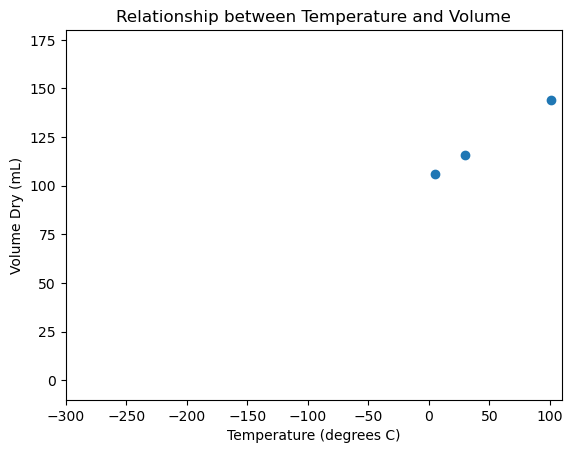

In [13]:
# Plot your data
# Change the text to represent the proper x and y axes values, and change the title
plt.figure()
plt.xlabel('Temperature (degrees C)')
plt.ylabel('Volume Dry (mL)')
plt.title("Relationship between Temperature and Volume")
plt.plot(temperature, volume_dry, 'o', label='measured data')
plt.ylim(-10, 180)
plt.xlim(-300, 110)

Now we determine the fit values from our equation of the line so that we can add them to the graph. 

In [14]:
# Use slope from the fit to determine the fitted values for the plot
fit_volume_dry = []
extrapolated_temperature = numpy.insert(temperature, 0, extrapolated_zero_temp)
#print(extrapolated_temperature)
for value in extrapolated_temperature:
    fit_volume = fit.slope * value + fit.intercept
    fit_volume_dry.append(fit_volume)

Now we will add this to the plot. 

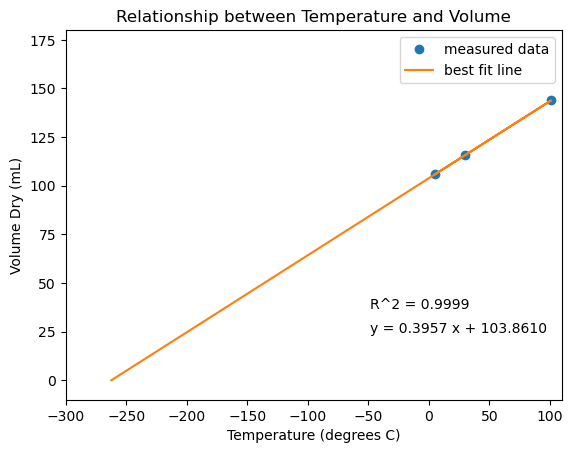

In [15]:

plt.figure()
plt.xlabel('Temperature (degrees C)')
plt.ylabel('Volume Dry (mL)')
plt.title("Relationship between Temperature and Volume")
plt.plot(temperature, volume_dry, 'o', label='measured data') 
plt.ylim(-10, 180)  # set up the limits for the x and y axes
plt.xlim(-300, 110)
plt.plot(extrapolated_temperature,fit_volume_dry, '-', label='best fit line')
plt.legend()
#adding text inside the plot
plt.figtext(0.6, 0.25, eqn_text)  # Place the equation text where you want it
plt.figtext(0.6, 0.3, R_text)
#plt.show()
plt.savefig('LAB_9.Charles_Law.png')


